In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  28.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [4]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<h2>Boxplot for Age Distribution</h2>

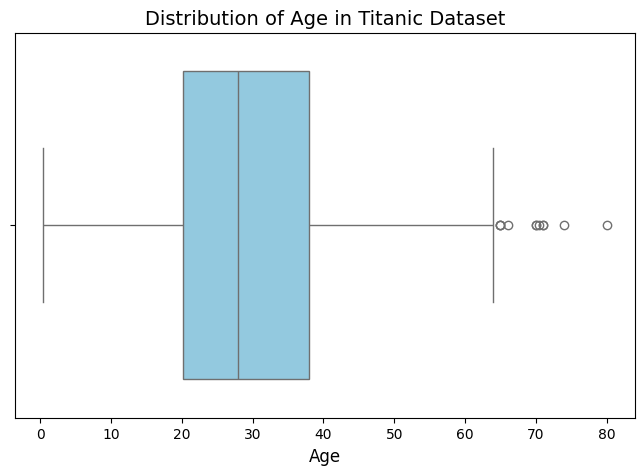

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=titanic["age"], color="skyblue")

plt.title("Distribution of Age in Titanic Dataset", fontsize=14)
plt.xlabel("Age", fontsize=12)

plt.show()
print("\nObservation: Maximum people are below the age of 40.\n")

<h4>Removing null values from dataset</h4>

In [7]:
# Fill missing ages with the median age
titanic["age"].fillna(titanic["age"].median(), inplace=True)

# Compute the overall median age
overall_median_age = titanic["age"].median()

# Replace any zero values in 'age' (if they exist) with the median age
titanic.loc[titanic["age"] == 0, "age"] = overall_median_age

# Verify changes
print(titanic["age"].describe())


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64


<h2>Boxplot for Age distribution by Gender</h2>

/tmp/ipykernel_4179/3686819186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="age", data=titanic, palette={"male": "lightblue", "female": "pink"})


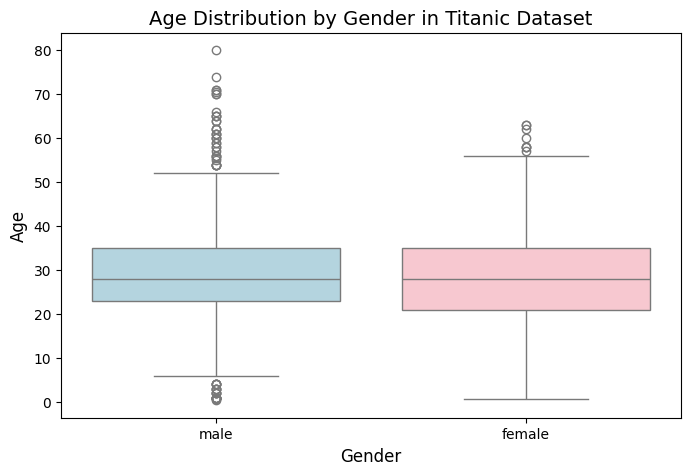

Observation: The age of men is slightly greater than that of women


In [18]:
# Create a boxplot for Age distribution by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x="sex", y="age", data=titanic, palette={"male": "lightblue", "female": "pink"})

# Add title and labels
plt.title("Age Distribution by Gender in Titanic Dataset", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Show the plot
plt.show()
print("Observation: The age of men is slightly greater than that of women")

<h2>Boxplot for Age distribution by Gender and their survival status</h2>

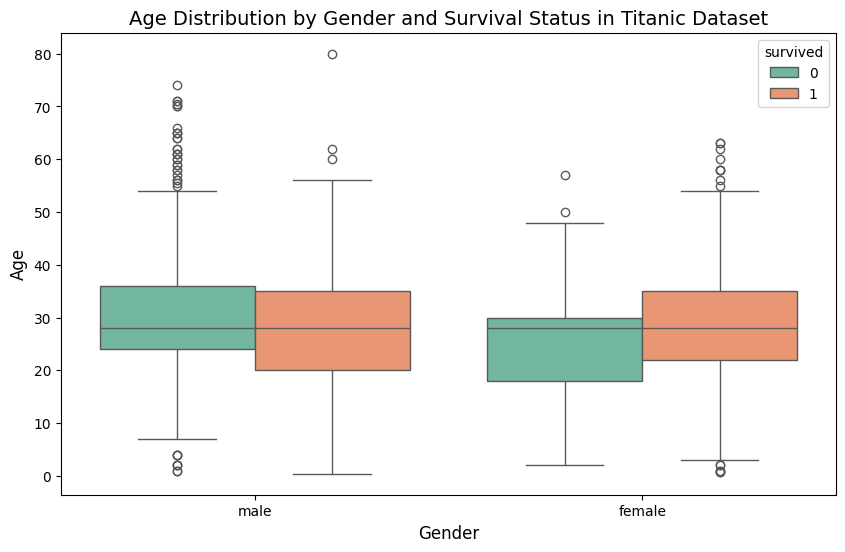

Observation: Survival rate of men is greater than women


In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="age", hue="survived", data=titanic, palette="Set2")

plt.title("Age Distribution by Gender and Survival Status in Titanic Dataset", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.show()
print("Observation: Survival rate of men is greater than women")